Random Forest using Kaggle Animal Shelter Dataset
https://www.kaggle.com/c/shelter-animal-outcomes

In [1]:
import pandas as pd
import os
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

In [2]:
data_dir = '/Users/christopherallison/Documents/Coding/Data'

win_data_dir = u'C:\\Users\\Owner\\Documents\\Data'

In [3]:
# Data cleanup
# TRAIN DATA
train_df = pd.read_csv(os.path.join(win_data_dir, 'shelter_train.csv'), header=0)        # Load the train file into a dataframe

In [4]:
train_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [5]:
outcomes = train_df.OutcomeType.unique()

In [6]:
from sklearn import preprocessing

In [7]:
encoder = preprocessing.LabelEncoder()

In [8]:
encoder.fit(outcomes)

LabelEncoder()

In [9]:
encoded_y = encoder.transform(outcomes)

In [10]:
encoded_y

array([3, 2, 0, 4, 1], dtype=int64)

In [11]:
list(encoder.inverse_transform([1, 2, 3]))

['Died', 'Euthanasia', 'Return_to_owner']

In [12]:
# convert integers into dummy variables (one hot encoding)
from keras.utils import np_utils

dummy_y = np_utils.to_categorical(encoded_y)

Using Theano backend.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [13]:
dummy_y

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [15]:
# Transform value in DF

train_df.OutcomeType = encoder.transform(train_df.OutcomeType)

In [16]:
train_df.head(50)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,3,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,2,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,0,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,4,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,4,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,4,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,4,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,4,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,0,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,0,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [17]:
train_df.OutcomeSubtype.unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

In [18]:
# Should convert all of these using LabelEncoder

outcome_sub = {}
for i, st in enumerate(train_df.OutcomeSubtype.unique()):
    outcome_sub[st] = i

In [19]:
train_df['OutcomeSubtype'] = train_df.OutcomeSubtype.map( outcome_sub ).astype(int)

In [20]:
train_df.AnimalType.unique()

array(['Dog', 'Cat'], dtype=object)

In [21]:
train_df['AnimalType'] = train_df.AnimalType.map( {'Dog': 0, 'Cat': 1} ).astype(int)

In [22]:
train_df.SexuponOutcome.unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [23]:
sex_outcome = {}
for i, sex in enumerate(train_df.SexuponOutcome.unique()):
    sex_outcome[sex] = i

In [24]:
sex_outcome

{nan: 5,
 'Intact Female': 3,
 'Spayed Female': 1,
 'Unknown': 4,
 'Neutered Male': 0,
 'Intact Male': 2}

In [25]:
train_df['SexuponOutcome'] = train_df.SexuponOutcome.map( sex_outcome ).astype(int)

In [26]:
train_df.AgeuponOutcome.unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years', nan,
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [27]:
period_dict = {'year': 365, 'month': 30, 'week': 7, 'day': 1, 'day': 1}

def convert_age_to_days(age):
    try:
        number, period = str(age).split()
        period = period.rstrip("s")
        days = int(number) * period_dict[period]
        return int(days)
    except ValueError:
        return 30
    

In [28]:
train_df['AgeuponOutcome'] = train_df.AgeuponOutcome.apply(convert_age_to_days)

In [29]:
train_df.AgeuponOutcome[:10]

0    365
1    365
2    730
3     21
4    730
5     30
6     21
7     21
8    150
9    365
Name: AgeuponOutcome, dtype: int64

In [30]:
train_df.Breed.unique()

array(['Shetland Sheepdog Mix', 'Domestic Shorthair Mix', 'Pit Bull Mix',
       ..., 'Vizsla/Boxer', 'German Shepherd/Australian Kelpie',
       'Boxer/German Shepherd'], dtype=object)

In [31]:
# Could do something with a countvectorizer for Breed & Color, but we'll stick to simple here

#from sklearn.feature_extraction.text import CountVectorizer
#count_vect = CountVectorizer()

In [ ]:
'''colour_counts = count_vect.fit_transform(train_df.Color)

count_vect.vocabulary_.get(u'black')

train_df['ColorVect'] = count_vect.fit_transform(train_df.Color)

breed_vect = CountVectorizer()
train_df['BreedVect'] = count_vect.fit_transform(train_df.Breed)'''

In [32]:
breed = {}

for i, b in enumerate(train_df.Breed.unique()):
    breed[b] = i
    
train_df['Breed'] = train_df.Breed.map( breed ).astype(int)

In [33]:
train_df.Color.unique()[:10]

array(['Brown/White', 'Cream Tabby', 'Blue/White', 'Blue Cream', 'Tan',
       'Black/Tan', 'Blue Tabby', 'Brown Tabby', 'Red/White', 'White'], dtype=object)

In [34]:
color = {}

for i, c in enumerate(train_df.Color.unique()):
    color[c] = i
    
train_df['Color'] = train_df.Color.map( color ).astype(int)

In [35]:
# We could also do something very cool with text analysis for names, but we'll keep it simple and go length

train_df['Name'] = train_df.Name.apply(lambda x: len(str(x)))

In [36]:
train_df.interpolate().head() # could have used dropna().median()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,7,2014-02-12 18:22:00,3,0,0,0,365,0,0
1,A656520,5,2013-10-13 12:44:00,2,1,1,1,365,1,1
2,A686464,6,2015-01-31 12:28:00,0,2,0,0,730,2,2
3,A683430,3,2014-07-11 19:09:00,4,3,1,2,21,1,3
4,A667013,3,2013-11-15 12:52:00,4,3,0,0,730,3,4


In [37]:
# Save our clean dataframe to csv so we don't need to do this again.
train_df.to_csv(os.path.join(win_data_dir, "clean_train.csv"))

In [38]:
# Work out a test_train_split to see how we do
X = train_df.drop(['AnimalID', 'DateTime', 'OutcomeType', 'Breed', 'Color'], axis=1)
X.dtypes

Name              int64
OutcomeSubtype    int32
AnimalType        int32
SexuponOutcome    int32
AgeuponOutcome    int64
dtype: object

In [39]:
X.AgeuponOutcome.replace('NA',0)

0         365
1         365
2         730
3          21
4         730
5          30
6          21
7          21
8         150
9         365
10        730
11        730
12       1460
13        730
14        365
15         90
16         21
17         14
18        730
19        365
20         60
21        365
22        730
23        300
24         60
25         30
26        180
27       1825
28         60
29       2555
         ... 
26699     730
26700     300
26701     330
26702     730
26703    2190
26704      28
26705      60
26706      60
26707     365
26708     730
26709      30
26710      30
26711     365
26712    4380
26713    6570
26714      60
26715      60
26716      60
26717    3285
26718      60
26719     730
26720      60
26721    1825
26722     150
26723    2190
26724      30
26725      90
26726    1460
26727      28
26728     365
Name: AgeuponOutcome, dtype: int64

In [40]:
train_features = X.values
train_features[:10]

array([[  7,   0,   0,   0, 365],
       [  5,   1,   1,   1, 365],
       [  6,   2,   0,   0, 730],
       [  3,   3,   1,   2,  21],
       [  3,   3,   0,   0, 730],
       [  4,   3,   0,   3,  30],
       [  5,   3,   1,   2,  21],
       [  3,   3,   1,   4,  21],
       [  4,   0,   0,   1, 150],
       [  3,   4,   0,   1, 365]], dtype=int64)

In [41]:
dummy_y

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [42]:
train_target = np_utils.to_categorical(train_df['OutcomeType'].values)
train_target

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [43]:
# Set up our train_test_split

X_train, x_test, y_train, y_test = train_test_split(train_features,
                                          train_target,
                                          test_size=0.4,
                                          random_state=42)

In [44]:
# New we finally get to the classifier!

clf = RandomForestClassifier(n_estimators=100)

In [45]:
clf = clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.8877595560266883'

In [46]:
clf.predict(x_test[0])

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.,  0.,  0.,  1.,  0.]])

In [74]:
test1 = np.argmax(clf.predict(x_test)[0])

In [75]:
test1

3

In [47]:
def reverse_dict_search(d, target):
    for k, v in d.items():
        if v == target:
            return k

In [80]:
def predict_outcome(animal):
    
    animaltype = {'Dog': 0,'Cat': 1}
    
    name, outcome_subtype, animal_class, sex, age = animal
    print("Name length:{}".format(name))
    print("Animal Type:{}".format(reverse_dict_search(animaltype, animal_class)))
    print("Sex:{}".format(reverse_dict_search(sex_outcome, sex)))
    print("Age:{} days".format(age))
    #print("Breed:{}".format(reverse_dict_search(breed, animal_breed)))
    #print("Color:{}".format(reverse_dict_search(color, animal_color)))
    print("Outcome Subtype: {}".format(reverse_dict_search(outcome_sub, outcome_subtype)))
    print("************")
    print("Prediction: {}\n".format(encoder.inverse_transform(
                np.argmax(clf.predict(animal)))))
    print(clf.predict(animal))

In [85]:
predict_outcome(x_test[8])

Name length:6
Animal Type:Dog
Sex:Neutered Male
Age:2190 days
Outcome Subtype: nan
************
Prediction: Return_to_owner

[[ 0.  0.  0.  1.  0.]]


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [86]:
# Evaluate the model
print (X_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16037, 5) (16037, 5)
(10692, 5) (10692, 5)


In [87]:
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("Accuracy = %.2f" % (accuracy_score(y_test, y_predict)))

Accuracy = 0.86


In [89]:
model_score = clf.score(x_test, y_test)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print ("Confusion Matrix \n", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.86 



ValueError: multilabel-indicator is not supported

In [101]:
# Create confusion matrix for test data

categories = ['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died']

from sklearn.metrics import classification_report, log_loss, average_precision_score
print(classification_report(y_test, 
                            y_predict, 
                            target_names=categories))

                 precision    recall  f1-score   support

Return_to_owner       0.80      0.89      0.84      4321
     Euthanasia       0.97      0.85      0.91        68
       Adoption       0.99      0.99      0.99       608
       Transfer       0.67      0.51      0.58      1917
           Died       1.00      1.00      1.00      3778

    avg / total       0.86      0.86      0.86     10692



In [103]:
print(average_precision_score(y_test, y_predict))

0.880366413882


In [117]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import interp

In [113]:
print(roc_auc_score(y_test, y_predict))

0.903622040588


In [115]:
n_classes = 5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_predict.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

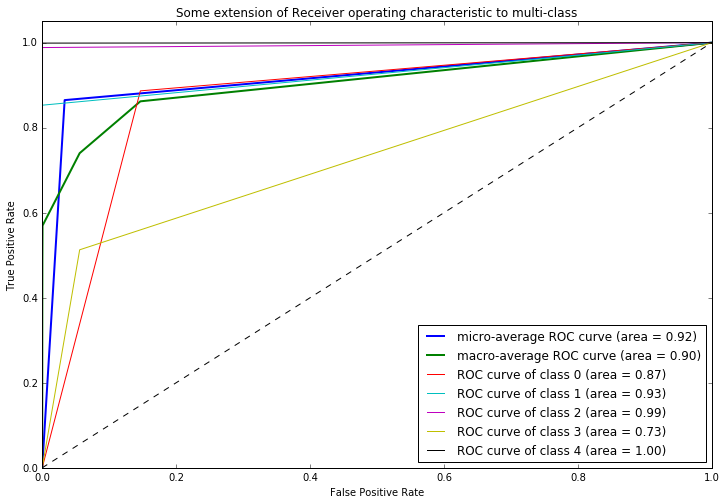

In [119]:
##############################################################################
# Plot ROC curves for the multiclass problem

# Compute macro-average ROC curve and ROC area


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [120]:
# Plot the importance of the different features

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
            axis=0)
indices = np.argsort(importances)[::-1]

1. feature 1 (0.667555)
2. feature 4 (0.133740)
3. feature 3 (0.117361)
4. feature 0 (0.053512)
5. feature 2 (0.027833)


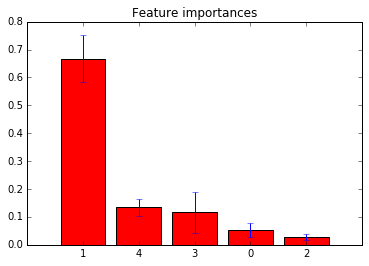

In [121]:
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [122]:
for i in [1, 4, 3, 0, 2]:
    print("Feature {}: {}".format(i, X.columns[i]))

Feature 1: OutcomeSubtype
Feature 4: AgeuponOutcome
Feature 3: SexuponOutcome
Feature 0: Name
Feature 2: AnimalType


In [92]:
#plot_confusion_matrix(confusion_matrix, categories, title="Animal Sanctuary Confusion Matrix")

NameError: name 'confusion_matrix' is not defined

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    # Simple plot based on the Iris sample CM
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# The data is now ready to go. So lets fit to the train, then predict to the test!
# Convert back to a numpy array
train_data = train_df.values
test_data = test_df.values

In [ ]:
print 'Training...'
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit( train_data[0::,1::], train_data[0::,0] )

In [ ]:
print 'Predicting...'
output = forest.predict(test_data).astype(int)

In [ ]:
predictions_file = open("myfirstforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'